In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.rc('figure', figsize=(12, 5))

# Carga de datos

Puesto que nuestro conjunto de datos está separado por cursos en ficheros csv, creamos una función que toma como argumento un identificador de curso y retorna un dataframe de pandas con los datos etiquetados con el identificador del curso.

In [2]:
def load_and_label(course):
    df = pd.read_csv('student-'+course+'.csv', sep=';')
    df['course'] = course
    return df

Usamos la función para cargar el curso de matématicas y portugués que uniremos en un único dataframe a continuación.

In [3]:
df_m = load_and_label('mat')
df_p = load_and_label('por')
df = pd.concat([df_m,df_p])

In [4]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,course
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,mat
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,mat
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,mat
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,mat
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,mat


# Análisis de distribución

Ahora procederemos a realizar un análisis de la distribución de ciertas variables para hacernos una idea de la población que manejamos en nuestro conjunto de datos. 

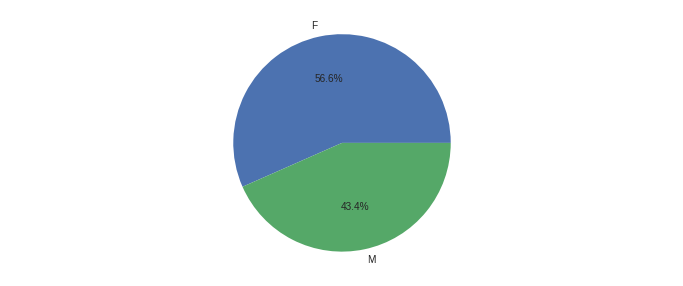

In [118]:
sums = df.sex.groupby(df.sex).count()
plt.axis('equal');
plt.pie(sums, labels=['F','M'],autopct='%1.1f%%');
plt.show()

Podemos observar que hay un mayor porcentaje de mujeres que de hombres.

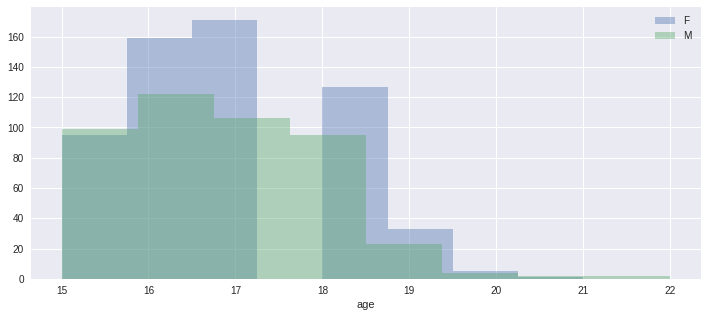

In [136]:
sns.distplot(df.age[df.sex=="F"], kde=False, label = 'F', bins=8)
sns.distplot(df.age[df.sex=="M"], kde=False, label = 'M', bins=8)
plt.legend()

Representando la distribución de edades por sexos, podemos observar que hay mayor densidad de hombres en edades jóvenes y adultas mientras que las mujeres se concentran en edades intermedias.

Ahora veremos como se distribuye el consumo de alcohol a diario en ambos sexos:

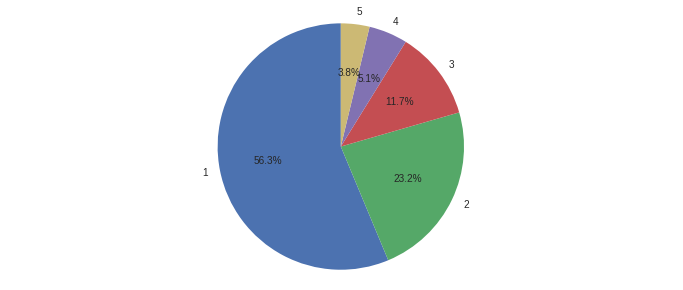

In [134]:
plt.pie(df.Dalc[df.sex=="M"].value_counts().tolist(),
        autopct='%1.1f%%', startangle=90, labels=['1','2','3','4','5'])
axis = plt.axis('equal')

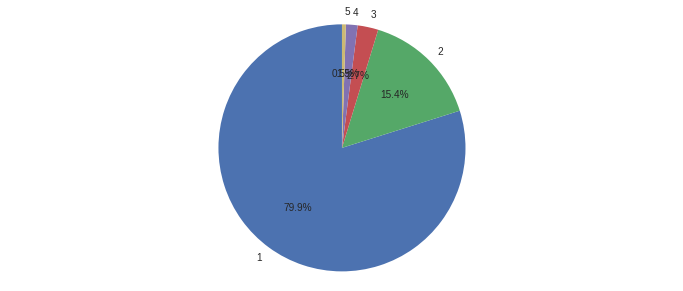

In [135]:
plt.pie(df.Dalc[df.sex=="F"].value_counts().tolist(),
        autopct='%1.1f%%', startangle=90, labels=['1','2','3','4','5'])
axis = plt.axis('equal')

Un mayor porcentaje de hombres consume alcohol frecuentemente entre semana comparado con las mujeres. 

# Análisis de correlación

Ya que nuestro conjunto de datos contiene información sobre el consumo de alcohol entre estudiantes, vamos a analizar la relación de éste con el resto de las variables. Prestaremos un especial interés a la posible relación entre el consumo de alcohol y el rendimiento académico de los alumnos.

Primero vamos a construtir la matriz de correlación entre todas las variables.

In [116]:
cm = df.corr()
cm.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.130196,-0.138521,0.049216,-0.007870,0.282364,0.007162,0.002645,0.118510,0.133453,0.098291,-0.029129,0.153196,-0.124121,-0.119475,-0.125282
Medu,-0.130196,1.000000,0.642063,-0.238181,0.090616,-0.187769,0.015004,0.001054,0.025614,0.001515,-0.029331,-0.013254,0.059708,0.226101,0.224662,0.201472
Fedu,-0.138521,0.642063,1.000000,-0.196328,0.033458,-0.191390,0.013066,0.002142,0.030075,-0.000165,0.019524,0.034288,0.040829,0.195898,0.182634,0.159796
traveltime,0.049216,-0.238181,-0.196328,1.000000,-0.081328,0.087177,-0.012578,-0.007403,0.049740,0.109423,0.084292,-0.029002,-0.022669,-0.121053,-0.140163,-0.102627
studytime,-0.007870,0.090616,0.033458,-0.081328,1.000000,-0.152024,0.012324,-0.094429,-0.072941,-0.159665,-0.229073,-0.063044,-0.075594,0.211314,0.183167,0.161629


Vamos a quedarnos con aquellos pares de variables cuya correlacion supere un umbral seleccionado arbitrariamente.

In [87]:
indices = np.where(np.logical_and(abs(cm)>0.3, cm!=1.0))
indices = [(cm.index[x], cm.columns[y], abs(cm.ix[x,y])) for x, y in zip(*indices)
                                        if x != y and x < y]

In [88]:
indices.sort(key=lambda tup: tup[2])
indices

[('freetime', 'goout', 0.32355575258605945),
 ('failures', 'G1', 0.37417487229128216),
 ('failures', 'G2', 0.37717217641689932),
 ('failures', 'G3', 0.38314527971827944),
 ('goout', 'Walc', 0.39979372589393308),
 ('Dalc', 'Walc', 0.62781383799009605),
 ('Medu', 'Fedu', 0.64206314571857515),
 ('G1', 'G3', 0.80914172054011158),
 ('G1', 'G2', 0.8587387525170479),
 ('G2', 'G3', 0.91074316305835523)]

Las tres variables más correlacionadas entre sí son las notas de los distintos periodos, siendo mayor el valor para periodos consecutivos (G1-G2 y G2-G3). Tiene sentido pues un buen resultado en examenes previos, es un buen indicativo de que el rendimiento futuro será bueno. 

Tras esto, parece haber una relación directa entre las profesiones de los padres (Medu, Fedu) que, aunque podría tener sentido, no aporta demasiado al tema que nos concierne.

En tercer lugar, nos encontramos con la primera relación interesante entre consumo de alcohol en dias laborales y fines de semana (Dalc, Walc). Podría decirse que un estudiante propenso a consumir alcohol un fin de semana tampoco tiene problemas en hacerlo entre semana. También, en cuarto lugar, observamos una relación directa entre consumo de alcohol en dias laborales y salidas con amigos.

Centrándonos únicamente en la relación de la nota final con el resto de las variables:

In [98]:
abs(cm["G3"]).sort_values()

absences      0.045671
famrel        0.054461
freetime      0.064890
health        0.080079
goout         0.097877
traveltime    0.102627
Walc          0.115740
age           0.125282
Dalc          0.129642
Fedu          0.159796
studytime     0.161629
Medu          0.201472
failures      0.383145
G1            0.809142
G2            0.910743
G3            1.000000
Name: G3, dtype: float64

Podemos ver como el número de repeticiones de curso, la profesión de los padres o el tiempo dedicado al estudio afectan más a la nota final que el consumo de alcohol.

No obstante, vamos a analizar ahora más en detalle esta relación entre alcohol y notas. Empezaremos observando la relación entre el consumo del alcohol diario y las notas finales obtenidas mediante un boxplot:

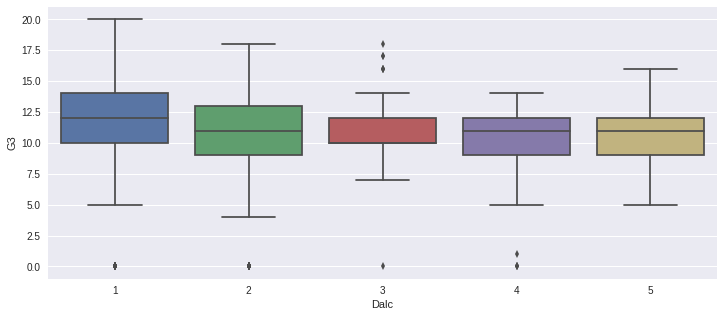

In [92]:
sns.boxplot(x="Dalc", y="G3", data=df)

La mediana de la nota final es alta en aquellos estudiantes que reportaron un consumo muy bajo de alcohol entre semana. La nota final de los estudiantes que reportaron consumos de alcohol moderados y altos disminuye, pero no varía excesivamente entre estos grupos.

Puede ser interesante observar si la situación es similar con el consumo de alcohol durante fines de semana.

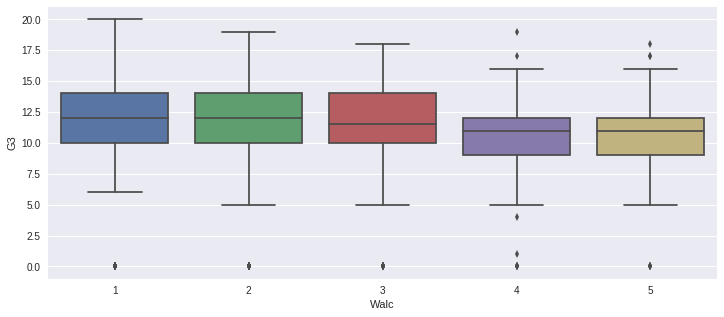

In [93]:
sns.boxplot(x="Walc", y="G3", data=df)

En este caso, parece que la nota final solo se ve significantemente afectada en consumos de alcohol altos y muy altos durante los fines de semana. 

Podemos observar una situación parecida a la previa (pero inversa) entre el consumo de alcohol entre semana o fines de semana y el número de ausencias a clase: 

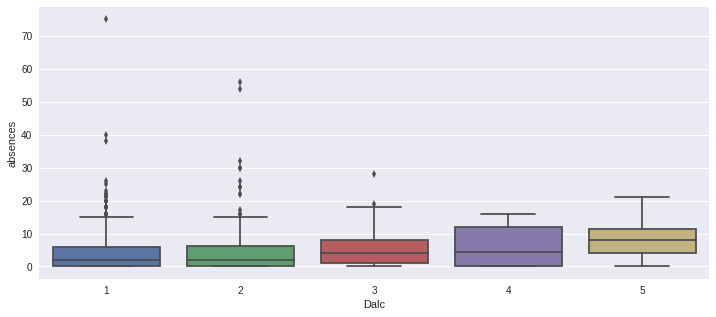

In [107]:
sns.boxplot(x="Dalc", y="absences", data=df)

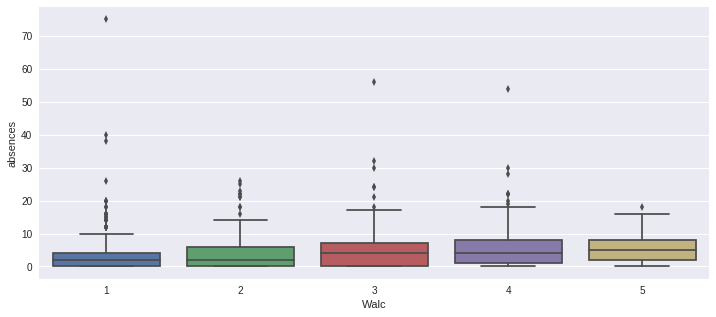

In [106]:
sns.boxplot(x="Walc", y="absences", data=df)

Otra manera de detectar grupos de variables relaciondas, es aplicar PCA y observar que variables aportan más peso a cada uno de los componentes que se han generado.

In [178]:
from sklearn import decomposition
df_num = df.select_dtypes(include=['int64'])
pca = decomposition.PCA(n_components=3)
pca.fit(df_num)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [179]:
for i in pca.components_:
    indices = np.argsort(i)[::-1]
    for f in range(5):
        print("%d. Feature %s (%f)" % (f + 1, df_num.columns.values[indices[f]], i[indices[f]]))
    print("\n")

1. Feature absences (0.942051)
2. Feature age (0.037423)
3. Feature Walc (0.037056)
4. Feature Dalc (0.025510)
5. Feature failures (0.022499)


1. Feature G3 (0.631504)
2. Feature G2 (0.527941)
3. Feature G1 (0.449612)
4. Feature absences (0.330399)
5. Feature Medu (0.051038)


1. Feature Walc (0.668068)
2. Feature goout (0.457180)
3. Feature Dalc (0.372414)
4. Feature health (0.280188)
5. Feature freetime (0.246772)




En la primera componente, solo la variable que mide las ausencias aporta un peso significativo. En el segundo grupo, las variables de resultados (G1,G2,G3) y ausencias a clase parecen estar relaciondas entre sí. Finalmente, en el último grupo parece haber un cluster de variables relacionadas con el consumo de alcohol, ocio y salud.

# Predicción de valores objetivo

Para entrenar el modelo que nos permita predecir el aprobado o suspenso, primero construiremos nuestro conjunto de entrenamiento a partir de los datos proporcionados.

En primer lugar, copiamos el dataset original en X borrando aquellas variables que vamos a predecir para que no afecten al resultado (data leaking). También, extraemos a otra variable Y el vector de nuestro valor objetivo.

In [75]:
df['passed'] = df['G3'].apply(lambda x: 1 if x>=10 else 0)
X = df.drop(['G1','G2','G3','passed', 'course'],axis=1)
Y = df['passed']

A continuación, convertimos a entero aquellas variables categóricas y las añadimos a X.

In [76]:
binaryYesNo = {'yes': 1, 'no': 0}
school_map  = {'MS': 1, 'GP': 0}
sex_map     = {'M': 1, 'F': 0}
address_map = {'R':1, 'U':0}
famsize_map = {'LE3':1, 'GT3':0}
pstatus_map = {'A':1, 'T':0}
mjob_map    = {'services' : 1, 
            'health' : 2, 
            'other' : 3, 
            'at_home' : 4, 
            'teacher' : 5}

fjob_map    = {'services' : 1, 
            'health' : 2, 
            'other' : 3, 
            'at_home' : 4, 
            'teacher' : 5}

reason_map   = {'course':1, 'other':2, 'reputation':3, 'home':4}
guardian_map = {'other':0, 'father':1, 'mother':1}

X.schoolsup  = X.schoolsup.map(binaryYesNo)
X.famsup     = X.famsup.map(binaryYesNo)
X.paid       = X.paid.map(binaryYesNo)
X.activities = X.activities.map(binaryYesNo)
X.nursery    = X.nursery.map(binaryYesNo)
X.higher     = X.higher.map(binaryYesNo)
X.internet   = X.internet.map(binaryYesNo)
X.romantic   = X.romantic.map(binaryYesNo)

X.school   = X.school.map(school_map)
X.sex      = X.sex.map(sex_map)
X.address  = X.address.map(address_map)
X.famsize  = X.famsize.map(famsize_map)
X.Pstatus  = X.Pstatus.map(pstatus_map)
X.Mjob     = X.Mjob.map(mjob_map)
X.Fjob     = X.Fjob.map(fjob_map)
X.reason   = X.reason.map(reason_map)
X.guardian = X.guardian.map(guardian_map)

Antes de nada, vamos a generar un holdout set sobre el que calcularemos el error del modelo final y que nos permitirá minimizar el overfitting. El entrenamiento y refinamiento de los modelos intermedios se realizará sobre el training set.

In [77]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.25)

A continuación, vamos a realizar una prueba rápida para tener una idea del rendimiento baseline que dispondremos. Para ello, usaremos los algoritmos de Logistic Regression, Random Forest, SVM y GBM, y calcularemos la media arimética de cada uno de los 5 folds de cross-validation. Usaremos como medida de la precisión de los modelos el f1-score ya que es más robusto que simplemente la precisión para problemas de clasificación binaria.

In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, cohen_kappa_score, roc_auc_score

In [151]:
cross_val_score(LogisticRegression(), Xtrain, ytrain, cv=5,scoring='f1').mean()

0.88346806608733996

In [102]:
cross_val_score(RandomForestClassifier(random_state=0), Xtrain, ytrain, cv=5,scoring='f1').mean()

0.85811524598099731

In [104]:
cross_val_score(GradientBoostingClassifier(random_state=0), Xtrain, ytrain, cv=5,scoring='f1').mean()

0.88009690713838307

In [107]:
cross_val_score(SVC(), Xtrain, ytrain, cv=5,scoring='f1').mean()

0.88103413656181184

Los primeros resultados con los parámetros por defecto no parecen ser muy alentadores. A continuación, probamos optimizando los hiper-parámetros para cada uno de los modelos.

In [123]:
def hyper_tunning(model,param):
    clf = GridSearchCV(model, param, n_jobs=-1, cv=5, scoring='f1')
    clf.fit(Xtrain, ytrain)
    print("Best params "+str(clf.best_params_))
    print("Best score "+str(clf.best_score_))
    return clf.best_estimator_

In [124]:
logistic = LogisticRegression()
param_grid = {
    "penalty": ['l1','l2'],
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}
logistic = hyper_tunning(logistic,param_grid)

Best params {'penalty': 'l1', 'C': 0.1}
Best score 0.886548343886


In [125]:
rf = RandomForestClassifier()
param_grid = { 
    "n_estimators"      : [200, 250],
    "criterion"         : ["gini", "entropy"],
    "max_features"      : [2, 3, 4],
    "max_depth"         : [9, 10, 11],
    "min_samples_split" : [3, 4, 5] ,
    "bootstrap": [True, False]
}
rf = hyper_tunning(rf,param_grid)

Best params {'bootstrap': True, 'max_depth': 10, 'n_estimators': 250, 'criterion': 'gini', 'min_samples_split': 5, 'max_features': 3}
Best score 0.892879457372


In [126]:
gbm = GradientBoostingClassifier()
param_grid = {
    "max_depth":[6,8], 
    "min_samples_split":[50,100,150],
    "min_samples_leaf": [7,8,9],
    "max_features":[2,3]
}
gbm = hyper_tunning(gbm,param_grid)

Best params {'min_samples_split': 50, 'max_depth': 6, 'min_samples_leaf': 7, 'max_features': 3}
Best score 0.889245573367


In [127]:
svc = SVC()
param_grid = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "kernel": ["rbf", "poly", "linear"]
}
svc = hyper_tunning(svc,param_grid)

Best params {'kernel': 'linear', 'C': 10}
Best score 0.891473807717


La situación no ha mejorado en exceso incluso con parámetros más optimos. De cara a mejorar el rendimiento en el futuro, se podrían probar los siguientes escenarios:
* normalizar o discretizar algunas variables númericas (absences o age)
* aplicar one-hot encoding a variables categóricas
* incluir alguna componente del PCA presentado previamente
* detección y eliminación de outliers en el conjunto de datos

Finalmente, evaluamos el mejor modelo entrenado previamente sobre nuestro holdout set.

In [139]:
f1_score(ytest, rf.predict(Xtest))

0.88248337028824841

In [148]:
roc_auc_score(ytest, rf.predict(Xtest))

0.56669246646026838

In [144]:
accuracy_score(ytest, rf.predict(Xtest))

0.79693486590038309

Una de las ventajas de los random forest es que nos permiten ver la importancia de cada una de las variables a la hora de predecir el resultado final.

In [153]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(5):
    print("%d. Feature %s (%f)" % (f + 1, Xtrain.columns.values[indices[f]], importances[indices[f]]))

1. Feature failures (0.129859)
2. Feature absences (0.084863)
3. Feature higher (0.047277)
4. Feature age (0.046745)
5. Feature Walc (0.046127)


Entre las 5 primeras variables nos encontramos que las veces que ha repetido el alumno la clase es con diferencia la más importante seguido del número de ausencias a clase.